# Test Tensorflow Lite SSD detector

In [26]:
import numpy as np
import tensorflow as tf
import cv2

model_path = "/home/boris/exported/ssd_mobilenet_v1_coco_2018_01_28/ssd_graph.tflite"
input_file = "/home/boris/dog.jpg"
label_path = "/home/boris/model/mscoco_label_map.pbtxt"

## Load Image & normalize for SSD

In [24]:
img_orig = cv2.imread(input_file)

img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (300, 300)).astype(np.float32)
img = img * 1./128. - 1
img = np.expand_dims(img, axis=0)

# Load TFLite model and allocate tensors.
interpreter = tf.contrib.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

## Push through the detector

In [37]:
# Pipe image through
input_shape = input_details[0]['shape']
input_data = img #np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
boxes = interpreter.get_tensor(output_details[0]['index']).squeeze(0)
classes = interpreter.get_tensor(output_details[1]['index']).squeeze(0)
scores = interpreter.get_tensor(output_details[2]['index']).squeeze(0)

num = interpreter.get_tensor(output_details[3]['index']).astype(int)[0]

## Visualization

In [43]:
# For visualization only!
# Clone model zoo and add models/research and models/research/slim to PYTHONPATH
from object_detection.utils import visualization_utils as vis_utils
from object_detection.utils.label_map_util import create_category_index_from_labelmap

import matplotlib.pylab as plt
%matplotlib inline

### Read Class File and Visualize

In [48]:
category_index = create_category_index_from_labelmap(label_path)

boxes = boxes[:num]
classes = classes[:num].astype(int)
scores = scores[:num]
threshold = 0.5

im_vis = vis_utils.visualize_boxes_and_labels_on_image_array(
                        img_orig,
                        boxes, classes, scores, category_index,
                        instance_masks=None, use_normalized_coordinates=True, 
                        line_thickness=5, min_score_thresh=threshold
                    )
im_vis = cv2.cvtColor(im_vis, cv2.COLOR_BGR2RGB)

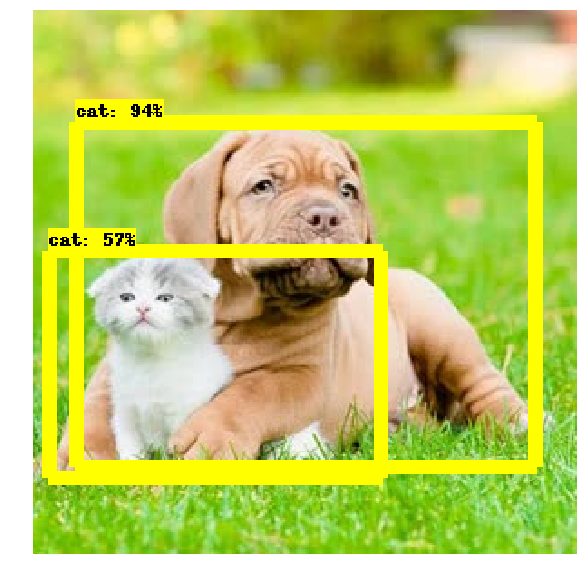

In [53]:
plt.rcParams['figure.figsize'] = 10, 10

plt.imshow(im_vis)
plt.axis('off')
plt.show()
